# Step 5: Data Cleaning, Wrangling, and Optional Exploration

In this notebook, we clean, wrangle, and explore the dataset related to food vendor sales at amusement parks. This step ensures the dataset is ready for feature engineering and model development. All work is part of the Machine Learning Engineering Capstone project.


In [ ]:
from IPython.display import display
from ipywidgets import FileUpload
uploader = FileUpload(accept='.csv', multiple=False)
display(uploader)


FileUpload(value={}, accept='.csv', description='Upload')

In [ ]:
import io
import pandas as pd

for name, file_info in uploader.value.items():
    content = file_info['content']
    try:
        df = pd.read_csv(io.BytesIO(content))
        print(f"File '{name}' loaded successfully!")

        # Check if the DataFrame has the expected columns
        if 'ds' not in df.columns or 'y' not in df.columns:
            print(f"Error: File '{name}' does not contain 'ds' and 'y' columns.")
            df = None # Set df to None to indicate invalid file

    except Exception as e:
        print(f"Error loading file '{name}': {e}")
        df = None # Set df to None to indicate invalid file

if df is not None:
    display(df.head())
else:
    print("Please upload a valid CSV file with 'ds' and 'y' columns.")

File 'prophet_input_beverages_store1.csv' loaded successfully!


,ds,y
0,2013-01-01,0.0
1,2013-01-02,1091.0
2,2013-01-03,919.0
3,2013-01-04,953.0
4,2013-01-05,1160.0


### Observation:
We examine whether there are any missing values in the dataset. If found, we will choose an appropriate strategy such as forward fill, backward fill, or interpolation.


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()


,0
ds,0
y,0


In [ ]:
# Ensure datetime format for the 'ds' column
df['ds'] = pd.to_datetime(df['ds'])

# Confirm data types
df.dtypes


,0
ds,datetime64[ns]
y,float64


### Explanation:
We ensure the 'ds' column is in datetime format, which is critical for time series forecasting models like Prophet.


### Note:
Duplicate records in time series can distort model performance. If any duplicates are found, we will remove them.


In [ ]:
# Count duplicated rows
df.duplicated().sum()


np.int64(0)

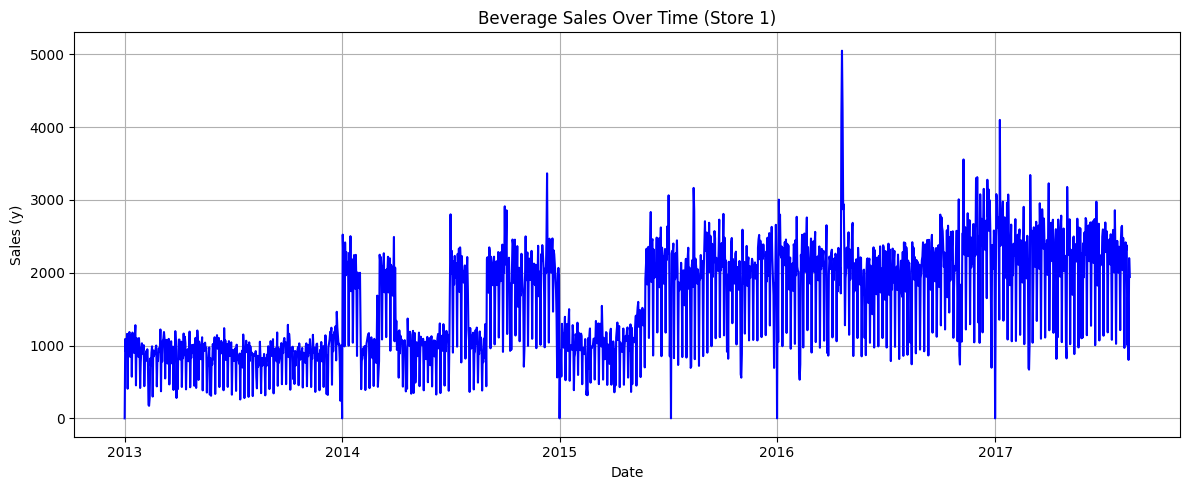

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['ds'], df['y'], color='blue')
plt.title("Beverage Sales Over Time (Store 1)")
plt.xlabel("Date")
plt.ylabel("Sales (y)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight:
A line plot helps reveal patterns such as seasonality, spikes, or drops in the data. This visualization will also help identify structural anomalies.


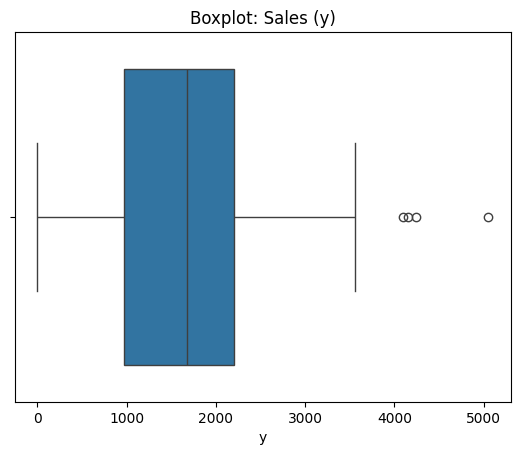

In [ ]:
import seaborn as sns

# Boxplot for outlier detection
sns.boxplot(x=df['y'])
plt.title("Boxplot: Sales (y)")
plt.show()

# Use IQR method to filter out outliers
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply filter
df = df[(df['y'] >= lower_bound) & (df['y'] <= upper_bound)]


### Decision:
We used the IQR method to handle outliers that may distort the model’s ability to learn seasonal and trend patterns. This enhances robustness of downstream forecasting.
